# **Group Coding Exercise: Exploring Text Processing and Word Importance**

<span style="color:red"># QUESTIONS AND ANSWERS #</span>

## **Objective**
In this notebook, we explore how different text-processing techniques (n-grams, stemming, lemmatization, and TF-IDF) influence the most important words in a dataset. We visualize the effects using word clouds and interpret the results.

By the end of this notebook, you'll understand:
- The impact of tokenization, stopword removal, stemming, and lemmatization
- How TF-IDF highlights important words or n-grams
- How different preprocessing methods affect the output of a model


## **Setup Instructions**
1. Install required libraries if needed:
```bash
pip install nltk sklearn wordcloud matplotlib
```
2. Import necessary libraries:


In [1]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

## **Step 1: Group Assignments**

This exercise was about experimenting with different text preprocessing techniques to understand their effects on word importance and text representation. Each group explored a specific method—such as tokenization, stopword removal, stemming, lemmatization, or n-grams—and analyzed how it influenced the output, particularly through the lens of TF-IDF and word cloud visualizations.



## **Step 2: Load a Sample Dataset**
We use a small collection of short texts to illustrate the differences caused by various preprocessing techniques.


In [2]:
sample_text = [
    "The quick brown fox jumps over the lazy dog.",
    "Natural Language Processing is amazing!",
    "I love exploring text analytics and data science.",
    "TF-IDF helps identify important words in documents."
]

## **Step 3: Text Processing Techniques**

### **Tokenization & Stopword Removal**

We remove punctuation, lowercase the text, and eliminate common words (like "the", "is") that don't carry much meaning.


In [3]:
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = word_tokenize(text.lower())
    return ' '.join([word for word in words if word.isalnum() and word not in stop_words])

processed_text = [preprocess_text(text) for text in sample_text]
processed_text

[nltk_data] Downloading package punkt to /Users/anne/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/anne/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['quick brown fox jumps lazy dog',
 'natural language processing amazing',
 'love exploring text analytics data science',
 'helps identify important words documents']

### **Stemming**

Stemming reduces words to their root forms by chopping off suffixes. This helps in grouping similar words (e.g., "running", "runner" → "run").


In [4]:
stemmer = PorterStemmer()

def stem_text(text):
    words = word_tokenize(text.lower())
    return ' '.join([stemmer.stem(word) for word in words if word.isalnum()])

stemmed_text = [stem_text(text) for text in sample_text]
stemmed_text

['the quick brown fox jump over the lazi dog',
 'natur languag process is amaz',
 'i love explor text analyt and data scienc',
 'help identifi import word in document']

### **Lemmatization**

Lemmatization is more refined than stemming: it converts words to their dictionary form (lemmas), considering context and part of speech.


In [5]:
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    words = word_tokenize(text.lower())
    return ' '.join([lemmatizer.lemmatize(word) for word in words if word.isalnum()])

lemmatized_text = [lemmatize_text(text) for text in sample_text]
lemmatized_text

[nltk_data] Downloading package wordnet to /Users/anne/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['the quick brown fox jump over the lazy dog',
 'natural language processing is amazing',
 'i love exploring text analytics and data science',
 'help identify important word in document']

### **N-Grams & TF-IDF**

We use bigrams (2-word combinations) and compute TF-IDF scores to identify the most informative phrases. TF-IDF reflects how important a term is in a set of documents.

This code identifies the top 10 most important bigrams (two-word phrases) in a collection of documents using TF-IDF. It begins by creating a TfidfVectorizer with ngram_range=(2,2) to focus on bigrams only. The vectorizer is then fitted to the dataset (sample_text), producing a sparse matrix where each entry represents the TF-IDF score of a bigram in a document. The bigram feature names are extracted, and their importance is calculated by summing the TF-IDF scores across all documents. Finally, the bigrams are sorted by their total importance and the top 10 are returned. This helps reveal which phrases are most characteristic or informative across the dataset, balancing frequency with uniqueness.

In [6]:
# Step 1: Initialize vectorizer for bigrams (use (3,3) for trigrams)
vectorizer = TfidfVectorizer(ngram_range=(2, 2))

# Step 2: Fit the vectorizer and create a document-term matrix
tfidf_matrix = vectorizer.fit_transform(sample_text)

# Step 3: Get the n-gram feature names (column labels)
feature_names = vectorizer.get_feature_names_out()

# Step 4: Compute total tf-idf score per n-gram (i.e., sum across all documents)
importance = np.array(tfidf_matrix.sum(axis=0)).flatten()

# Step 5: Sort by importance and keep top 10 n-grams
top_ngrams = sorted(zip(feature_names, importance), key=lambda x: -x[1])[:10]

# Step 6: Convert to dictionary format for word cloud input
top_ngrams_dict = dict(top_ngrams)
top_ngrams_dict


{'is amazing': 0.5,
 'language processing': 0.5,
 'natural language': 0.5,
 'processing is': 0.5,
 'analytics and': 0.408248290463863,
 'and data': 0.408248290463863,
 'data science': 0.408248290463863,
 'exploring text': 0.408248290463863,
 'love exploring': 0.408248290463863,
 'text analytics': 0.408248290463863}

## **Step 4: Generate Word Clouds**

We visualize the preprocessed text using word clouds. The larger the word, the more frequently it appears in the text.


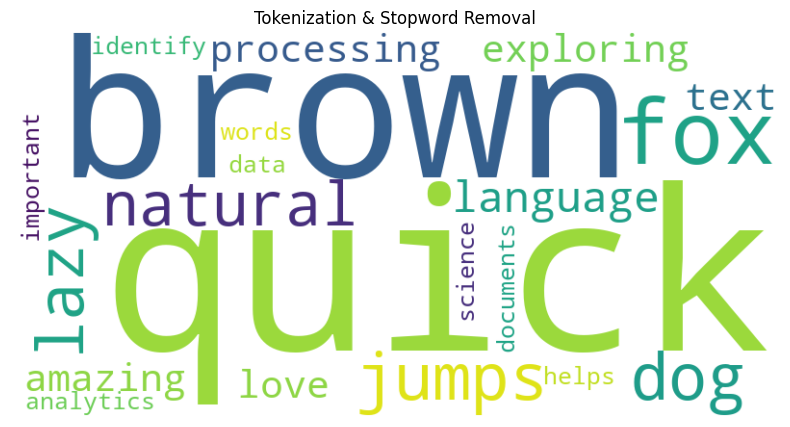

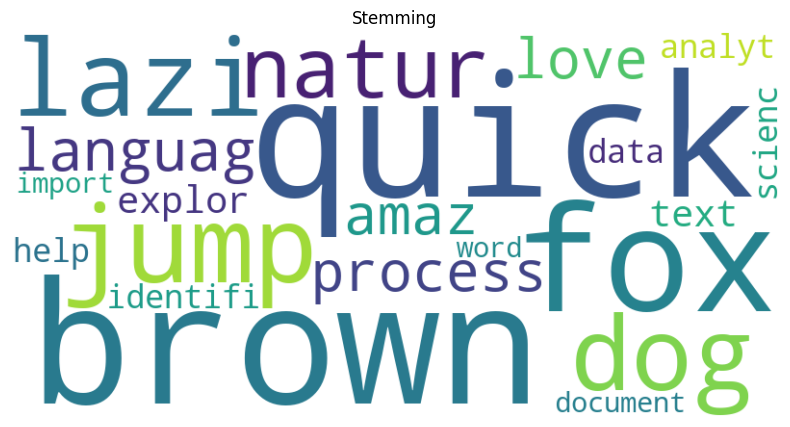

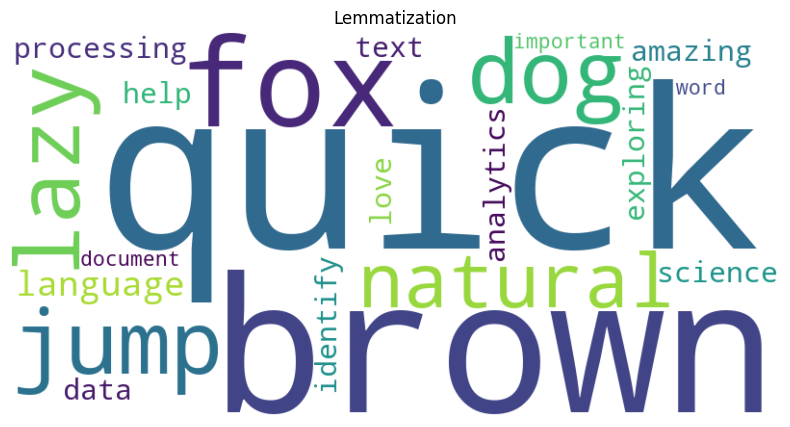

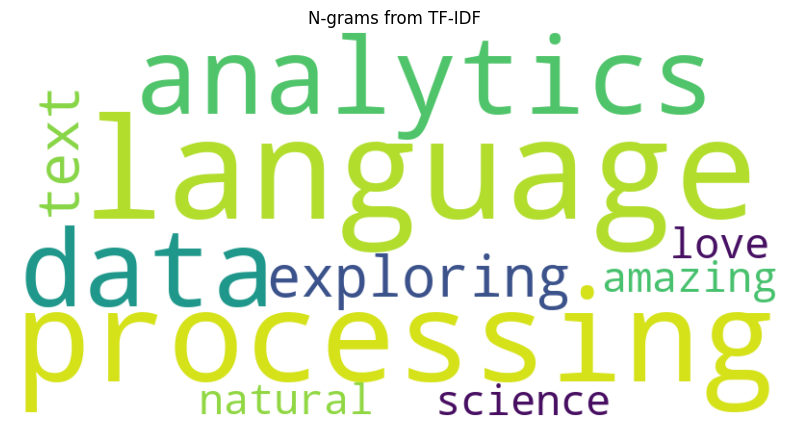

In [8]:
def generate_wordcloud(text_list, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text_list))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

# Example usage:
generate_wordcloud(processed_text, "Tokenization & Stopword Removal")
generate_wordcloud(stemmed_text, "Stemming")
generate_wordcloud(lemmatized_text, "Lemmatization")
generate_wordcloud(top_ngrams_dict, "N-grams from TF-IDF")

# **Step 5 Interpretation**

### 1. How does preprocessing change the key words?

Preprocessing reduces noise. Stopword removal eliminates common but meaningless words. Stemming and lemmatization group similar words together, reducing vocabulary size and making word frequency more meaningful.

### 2. Do n-grams reveal different insights than single words?

Yes. N-grams capture phrases and word combinations. While single words might show topics, n-grams can reveal expressions or patterns that are more contextually rich (e.g., "data science" is more informative than "data" and "science" separately).

### 3. What do TF-IDF scores tell us about word importance?

TF-IDF scores highlight words that are unique or frequent in a document but not common across all documents. This helps identify terms that are particularly relevant or distinguishing for specific entries in the corpus.
